In [12]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
### DATA API ###

In [17]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [18]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [19]:
## CHAINING TRANSFORMATIONS ##

In [20]:
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [21]:
dataset = dataset.map(lambda x: x * 2)
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


In [22]:
dataset = dataset.unbatch()
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, sh

In [23]:
dataset = dataset.filter(lambda x: x < 10)
for item in dataset.take(3):
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [24]:
## SHUFFLING THE DATA ##

In [25]:
tf.random.set_seed(42)

dataset = tf.data.Dataset.range(10).repeat(3)
dataset = dataset.shuffle(buffer_size=3, seed=42).batch(7)

for item in dataset:
    print(item)

tf.Tensor([1 3 0 4 2 5 6], shape=(7,), dtype=int64)
tf.Tensor([8 7 1 0 3 2 5], shape=(7,), dtype=int64)
tf.Tensor([4 6 9 8 9 7 0], shape=(7,), dtype=int64)
tf.Tensor([3 1 4 5 2 8 7], shape=(7,), dtype=int64)
tf.Tensor([6 9], shape=(2,), dtype=int64)


In [30]:
# Interleaving lines from multiple files #

In [31]:
# Split the California dataset to multiple CSV files
from sklearn.datasets        import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

# Load and split the data
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid         = train_test_split(X_train_full, y_train_full, random_state=42)

# Compute the mean and stddev of the training set
scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std  = scaler.scale_

In [32]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [33]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data  = np.c_[X_test,  y_test]

header_cols = housing.feature_names + ["MedianHouseValue"]
header      = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths  = save_to_multiple_csv_files(test_data,  "test",  header, n_parts=10)

In [34]:
# Okay, now let's take a peek at the first few lines of one of these CSV files
import pandas as pd

pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


In [35]:
train_filepaths

['datasets\\housing\\my_train_00.csv',
 'datasets\\housing\\my_train_01.csv',
 'datasets\\housing\\my_train_02.csv',
 'datasets\\housing\\my_train_03.csv',
 'datasets\\housing\\my_train_04.csv',
 'datasets\\housing\\my_train_05.csv',
 'datasets\\housing\\my_train_06.csv',
 'datasets\\housing\\my_train_07.csv',
 'datasets\\housing\\my_train_08.csv',
 'datasets\\housing\\my_train_09.csv',
 'datasets\\housing\\my_train_10.csv',
 'datasets\\housing\\my_train_11.csv',
 'datasets\\housing\\my_train_12.csv',
 'datasets\\housing\\my_train_13.csv',
 'datasets\\housing\\my_train_14.csv',
 'datasets\\housing\\my_train_15.csv',
 'datasets\\housing\\my_train_16.csv',
 'datasets\\housing\\my_train_17.csv',
 'datasets\\housing\\my_train_18.csv',
 'datasets\\housing\\my_train_19.csv']

In [36]:
# Build an input pipeline #

In [37]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

In [40]:
# Read 5 files at a time and interleave their lines, skipping the header
n_readers = 5
dataset   = filepath_dataset.interleave(lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
                                        cycle_length=n_readers)

In [42]:
# These are the first rows (ignoring the header row) of five interleaved CSV files, chosen randomly.
# Looks good! But as you can see, these are just byte strings; we need to parse them and scale the data.

for line in dataset.take(5):
    print(line.numpy())

b'4.6477,38.0,5.03728813559322,0.911864406779661,745.0,2.5254237288135593,32.64,-117.07,1.504'
b'8.72,44.0,6.163179916317992,1.0460251046025104,668.0,2.794979079497908,34.2,-118.18,4.159'
b'3.8456,35.0,5.461346633416459,0.9576059850374065,1154.0,2.8778054862842892,37.96,-122.05,1.598'
b'3.3456,37.0,4.514084507042254,0.9084507042253521,458.0,3.2253521126760565,36.67,-121.7,2.526'
b'3.6875,44.0,4.524475524475524,0.993006993006993,457.0,3.195804195804196,34.04,-118.15,1.625'


In [43]:
# Preprocessing the data #

In [62]:
# X_mean and X_std were computed earlier
n_inputs = 8 # X_train.shape[-1]

@tf.function
def preprocess(line):
    # 8 float attributes with default values zero + 1 label
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y # scale the input features and return the tuple (X_scaled, targets)

In [63]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579157,  1.216324  , -0.05204565, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

In [64]:
# We can now apply the function to the dataset

In [65]:
# Putting everything together #

In [80]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    dataset = dataset.interleave(lambda filepath: tf.data.TextLineDataset(filepath).skip(1), cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.batch(batch_size)
    
    return dataset.prefetch(1)

In [69]:
tf.random.set_seed(42)

train_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in train_set.take(2):
    print("X =", X_batch)
    print("y =", y_batch)
    print()

X = tf.Tensor(
[[ 0.5804519  -0.20762321  0.05616303 -0.15191229  0.01343246  0.00604472
   1.2525111  -1.3671792 ]
 [ 5.818099    1.8491895   1.1784915   0.28173092 -1.2496178  -0.3571987
   0.7231292  -1.0023477 ]
 [-0.9253566   0.5834586  -0.7807257  -0.28213993 -0.36530012  0.27389365
  -0.76194876  0.72684526]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[1.752]
 [1.313]
 [1.535]], shape=(3, 1), dtype=float32)

X = tf.Tensor(
[[-0.8324941   0.6625668  -0.20741376 -0.18699841 -0.14536144  0.09635526
   0.9807942  -0.67250353]
 [-0.62183803  0.5834586  -0.19862501 -0.3500319  -1.1437552  -0.3363751
   1.107282   -0.8674123 ]
 [ 0.8683102   0.02970133  0.3427381  -0.29872298  0.7124906   0.28026953
  -0.72915536  0.86178064]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[0.919]
 [1.028]
 [2.182]], shape=(3, 1), dtype=float32)



In [70]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set  = csv_reader_dataset(test_filepaths)

In [81]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [74]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

batch_size = 32
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=10, validation_data=valid_set)

Epoch 1/10
362/362 [==============================] - 2s 5ms/step - loss: 1.4679 - val_loss: 21.5124
Epoch 2/10
362/362 [==============================] - 1s 3ms/step - loss: 0.8735 - val_loss: 0.6648
Epoch 3/10
362/362 [==============================] - 1s 3ms/step - loss: 0.6317 - val_loss: 0.6196
Epoch 4/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5933 - val_loss: 0.5669
Epoch 5/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5629 - val_loss: 0.5402
Epoch 6/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5693 - val_loss: 0.5209
Epoch 7/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5231 - val_loss: 0.6130
Epoch 8/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5074 - val_loss: 0.4818
Epoch 9/10
362/362 [==============================] - 1s 3ms/step - loss: 0.4963 - val_loss: 0.4904
Epoch 10/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5023 - val_loss: 0.458

In [75]:
model.evaluate(test_set, steps=len(X_test) // batch_size)

161/161 [==============================] - 0s 2ms/step - loss: 0.4788


0.4787752032279968

In [76]:
## THE `TFRecord` FORMAT ##

In [83]:
# It is a very simple binary format that just contains a sequence of binary records of varying sizes.
# Each record is comprised of a length, a CRC checksum to check that the length was not corrupted,
# then the actual data, and finally a CRC checksum for the data.

In [86]:
with tf.io.TFRecordWriter("datasets/my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [87]:
filepaths = ["datasets/my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


In [89]:
### PREPROCESSING THE INPUT FEATURES ###

In [90]:
# 1) We can prepare our data files before training the model (e.g: using pandas, sklearn, numpy)
# 2) Alternatively, we can process our data on the fly when loading it with the Data API (e.g.: using `map()`)
# 3) Or we can include a `preprocessing layer` directly in our model. Let's look at this option now

In [94]:
class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)        
        self.stds_  = np.std( data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())

In [106]:
data_sample = [1, 2]

std_layer = Standardization()
std_layer.adapt(data_sample)

model = keras.Sequential()
model.add(std_layer)
# [...]
# model.compile([...])
# model.fit([...])

In [108]:
## ENCODING CATEGORICAL FEATURES USING `ONE-HOT VECTORS` ##

In [109]:
## ENCODING CATEGORICAL FEATURES USING `EMBEDDINGS` ##

In [110]:
### TF TRANSFORM ###

In [1]:
### EXERCISES ###

In [2]:
# 1. Why would you want to use the Data API?

# The Data API is useful when the training data doesn't fit in RAM
# It allows us to build an efficient pipeline for processing
# e.g.: while GPU is processing a batch, CPU is preparing the next batch (this can be done using the `prefatch()` method)

# Ingesting a large dataset and preprocessing it efficiently can be a complex engi‐
# neering challenge. The Data API makes it fairly simple. It offers many features,
# including loading data from various sources (such as text or binary files), reading
# data in parallel from multiple sources, transforming it, interleaving the records,
# shuffling the data, batching it, and prefetching it.

In [3]:
# 2. What are the benefits of splitting a large dataset into multiple files?

# -> Read them in parallel from multiple sources, without needing to load the entire dataset in the RAM
# -> Interleave the small files (coarse shuffling) and then shuffle at a finer level (using a shuffling buffer)

# Splitting a large dataset into multiple files makes it possible to shuffle it at a
# coarse level before shuffling it at a finer level using a shuffling buffer. It also
# makes it possible to handle huge datasets that do not fit on a single machine. It’s
# also simpler to manipulate thousands of small files rather than one huge file; for example,
# it’s easier to split the data into multiple subsets. Lastly, if the data is split
# across multiple files spread across multiple servers, it is possible to download sev‐
# eral files from different servers simultaneously, which improves the bandwidth usage.

In [4]:
# 3. During training, how can you tell that your input pipeline is the bottleneck? What can you do to fix it?

# You can use TensorBoard to visualize profiling data: if the GPU is not fully uti‐
# lized then your input pipeline is likely to be the bottleneck. You can fix it by mak‐
# ing sure it reads and preprocesses the data in multiple threads in parallel, and
# ensuring it prefetches a few batches. If this is insufficient to get your GPU to
# 100% usage during training, make sure your preprocessing code is optimized.
# You can also try saving the dataset into multiple TFRecord files, and if necessary
# perform some of the preprocessing ahead of time so that it does not need to be
# done on the fly during training (TF Transform can help with this). If necessary,
# use a machine with more CPU and RAM, and ensure that the GPU bandwidth is large enough

In [5]:
# 4. Can you save any binary data to a TFRecord file, or only serialized protocol buffers?

# A TFRecord file is composed of a sequence of arbitrary binary records: you can
# store absolutely any binary data you want in each record. However, in practice
# most TFRecord files contain sequences of serialized protocol buffers. This makes
# it possible to benefit from the advantages of protocol buffers, such as the fact that
# they can be read easily across multiple platforms and languages and their defini‐
# tion can be updated later in a backward-compatible way.

In [6]:
# 5. Why would you go through the hassle of converting all your data to the Example
# protobuf format? Why not use your own protobuf definition?

# The Example protobuf format has the advantage that TensorFlow provides some
# operations to parse it (the tf.io.parse*example() functions) without you hav‐
# ing to define your own format. It is sufficiently flexible to represent instances in
# most datasets. However, if it does not cover your use case, you can define your
# own protocol buffer, compile it using protoc (setting the --descriptor_set_out
# and --include_imports arguments to export the protobuf descriptor), and use
# the tf.io.decode_proto() function to parse the serialized protobufs (see the
# “Custom protobuf ” section of the notebook for an example). It’s more compli‐
# cated, and it requires deploying the descriptor along with the model, but it can be done.

In [7]:
# 6. When using TFRecords, when would you want to activate compression? Why
# not do it systematically?

# When using TFRecords, you will generally want to activate compression if the
# TFRecord files will need to be downloaded by the training script, as compression
# will make files smaller and thus reduce download time. But if the files are located
# on the same machine as the training script, it’s usually preferable to leave com‐
# pression off, to avoid wasting CPU for decompression.

In [8]:
# 7. Data can be preprocessed directly when writing the data files, or within the
# tf.data pipeline, or in preprocessing layers within your model, or using TF Transform.
# Can you list a few pros and cons of each option?

# • If you preprocess the data when creating the data files, the training script will
# run faster, since it will not have to perform preprocessing on the fly. In some
# cases, the preprocessed data will also be much smaller than the original data, so
# you can save some space and speed up downloads. It may also be helpful to
# materialize the preprocessed data, for example to inspect it or archive it. How‐
# ever, this approach has a few cons. First, it’s not easy to experiment with vari‐
# ous preprocessing logics if you need to generate a preprocessed dataset for
# each variant. Second, if you want to perform data augmentation, you have to
# materialize many variants of your dataset, which will use a large amount of
# disk space and take a lot of time to generate. Lastly, the trained model will
# expect preprocessed data, so you will have to add preprocessing code in your
# application before it calls the model.

# • If the data is preprocessed with the tf.data pipeline, it’s much easier to tweak
# the preprocessing logic and apply data augmentation. Also, tf.data makes it
# easy to build highly efficient preprocessing pipelines (e.g., with multithreading
# and prefetching). However, preprocessing the data this way will slow down
# training. Moreover, each training instance will be preprocessed once per epoch
# rather than just once if the data was preprocessed when creating the data files.
# Lastly, the trained model will still expect preprocessed data.

# • If you add preprocessing layers to your model, you will only have to write the
# preprocessing code once for both training and inference. If your model needs
# to be deployed to many different platforms, you will not need to write the pre‐
# processing code multiple times. Plus, you will not run the risk of using the
# wrong preprocessing logic for your model, since it will be part of the model.
# On the downside, preprocessing the data will slow down training, and each
# training instance will be preprocessed once per epoch. Moreover, by default
# the preprocessing operations will run on the GPU for the current batch (you
# will not benefit from parallel preprocessing on the CPU, and prefetching). For‐
# tunately, the upcoming Keras preprocessing layers should be able to lift the
# preprocessing operations from the preprocessing layers and run them as part
# of the tf.data pipeline, so you will benefit from multithreaded execution on the
# CPU and prefetching.

# • Lastly, using TF Transform for preprocessing gives you many of the benefits
# from the previous options: the preprocessed data is materialized, each instance
# is preprocessed just once (speeding up training), and preprocessing layers get
# generated automatically so you only need to write the preprocessing code
# once. The main drawback is the fact that you need to learn how to use this tool.

In [9]:
# 8. Name a few common techniques you can use to encode categorical features. What about text?

# Ordinal encoding (0 - "bad", 1 - "average", 2 - "good")
# One-hot encoding if there are few categories
# Embeddings if there are many categories (possibly pretrained)

In [10]:
# 9. Load the Fashion MNIST dataset (introduced in Chapter 10); split it into a training set,
# a validation set, and a test set; shuffle the training set; and save each
# dataset to multiple TFRecord files. Each record should be a serialized Example
# protobuf with two features: the serialized image (use tf.io.serialize_tensor() to serialize each image),
# and the label. Then use tf.data to create an efficient dataset for each set.
# Finally, use a Keras model to train these datasets, including a
# preprocessing layer to standardize each input feature. Try to make the input
# pipeline as efficient as possible, using TensorBoard to visualize profiling data.

In [13]:
# Load the dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
# Reset keras backend and set the random seed
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
# Create the tf Datasets
train_set = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train))
valid_set = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
test_set  = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [27]:
BytesList = tf.train.BytesList
FloatList = tf.train.FloatList
Int64List = tf.train.Int64List
Feature   = tf.train.Feature
Features  = tf.train.Features
Example   = tf.train.Example

In [82]:
# Generate a `TFRecord` serialized as `Example` protobuf
def create_example(image, label):
    image_data = tf.io.serialize_tensor(image)
    return Example(
        features=Features(
            feature={
                "image": Feature(bytes_list=BytesList(value=[image_data.numpy()])),
                "label": Feature(int64_list=Int64List(value=[label.numpy()])),
            }))

In [83]:
# Let's look at one serialized TFRecord
for image, label in valid_set.take(1):
    print(create_example(image, label))

features {
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\010\004\022\010\022\002\010\034\022\002\010\034\"\220\006\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\001\000\000\rI\000\000\001\004\000\000\000\000\001\001\000\000\000\000\000\000\000\000\000\000\000\000\000\003\000$\210\177>6\000\000\000\001\003\004\000\000\003\000\000\000\000\000\000\000\000\000\000\000\000\006\000f\314\260\206\220{\027\000\000\000\000\014\n\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\233\354\317\262k\234\241m@\027M\202H\017\000\000\000\000\000\000\000\000\000\000\000\001\000E\317\337\332\330\330\243\177yz\222\215X\254B\000\000\00

In [85]:
# The following function saves a given dataset to a set of TFRecord files.
# The examples are written to the files in a round-robin fashion.
# To do this, we enumerate all the examples using the dataset.enumerate() method,
# and we compute index % n_shards to decide which file to write to.
# We use the standard contextlib.ExitStack class to make sure that all writers are properly closed
# whether or not an I/O error occurs while writing.

In [90]:
from contextlib import ExitStack

# Save the training, validation and testing sets as TFRecords, using the function `create_example()` written earlier
def write_tfrecords(name, dataset, n_shards=10):
    paths = ["datasets/tfrecords/{}.tfrecord-{:05d}-of-{:05d}".format(name, index, n_shards) for index in range(n_shards)]
    with ExitStack() as stack:
        writers = [stack.enter_context(tf.io.TFRecordWriter(path)) for path in paths]
        for index, (image, label) in dataset.enumerate():
            shard = index % n_shards
            example = create_example(image, label) # function written earlier
            writers[shard].write(example.SerializeToString())
    return paths

In [91]:
# Save the sets
train_filepaths = write_tfrecords("fashion_mnist.train", train_set)
valid_filepaths = write_tfrecords("fashion_mnist.valid", valid_set)
test_filepaths  = write_tfrecords("fashion_mnist.test",  test_set)

In [96]:
# Now, let's use the written TFRecords and generate the tf Dataset (using the tf.data API)

# Preprocess a single TFRecord
def preprocess(tfrecord):
    feature_descriptions = {
        "image": tf.io.FixedLenFeature([], tf.string, default_value=""),
        "label": tf.io.FixedLenFeature([], tf.int64,  default_value=-1)
    }
    
    example = tf.io.parse_single_example(tfrecord, feature_descriptions)
    image   = tf.io.parse_tensor(example["image"], out_type=tf.uint8)
    image   = tf.reshape(image, shape=[28, 28])
    label   = example["label"]
    return image, label

# Generate a tf Dataset, using the `preprocess()` function written earlier 
def mnist_dataset(filepaths, n_read_threads=5, shuffle_buffer_size=None, n_parse_threads=5, batch_size=32, cache=True):
    # Create a tf Dataset and generate a pipeline of transformations
    dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=n_read_threads)
    
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
        
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads) # function written earlier
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)

In [97]:
train_set = mnist_dataset(train_filepaths, shuffle_buffer_size=60000)
valid_set = mnist_dataset(valid_filepaths)
test_set  = mnist_dataset(test_filepaths)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


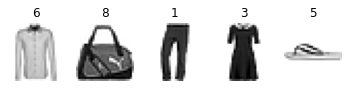

In [98]:
# Let's plot some images from the training set
for X, y in train_set.take(1):
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X[i].numpy(), cmap="binary")
        plt.axis("off")
        plt.title(str(y[i].numpy()))

In [99]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [101]:
class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_  = np.std( data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())

# Create a standardization layer
standardization = Standardization(input_shape=[28, 28])

# Exclude 100 labels from `sample_image`. This is a representative sample from the training set
# with the purpose of `adapting` the standardization layer to the training data (compute `means_` and `stds_`)
sample_image_batches = train_set.take(100).map(lambda image, label: image)
sample_images        = np.concatenate(list(sample_image_batches.as_numpy_iterator()), axis=0).astype(np.float32)
standardization.adapt(sample_images)

# Define the model's layers
model = keras.models.Sequential([
    standardization,                             # preprocess layer (input layer)
    keras.layers.Flatten(),                      # preprocess layer
    keras.layers.Dense(100, activation="relu"),  # hidden layer
    keras.layers.Dense(10, activation="softmax") # output layer (with 10 exclusive classes)
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [102]:
from datetime import datetime

# Create a TensorBoard callback
logs = os.path.join(os.curdir, "logs/tfrecords/", "run_" + datetime.now().strftime("%Y%m%d_%H%M%S"))
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=logs, histogram_freq=1, profile_batch=10)

# Fit the model
model.fit(train_set, epochs=5, validation_data=valid_set, callbacks=[tensorboard_cb])

Epoch 1/5
      1/Unknown - 0s 1ms/step - loss: 3.0546 - accuracy: 0.0312WARNING:tensorflow:From F:\anaconda3\envs\tf-keras-gpu\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4490 - accuracy: 0.8413 - val_loss: 0.4055 - val_accuracy: 0.8664
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3385 - accuracy: 0.8789 - val_loss: 0.4027 - val_accuracy: 0.8694
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.8924 - val_loss: 0.3583 - val_accuracy: 0.8832
Epoch 4/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2710 - accuracy: 0.9017 - val_loss: 0.3654 - val_accuracy: 0.8818
Epoch 5/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.

In [112]:
# Let's open TensorBoard and check the profiling tab (it requires `tensorboard-plugin-profile`)
# %load_ext tensorboard
# %tensorboard --logdir=./logs/tfrecords --port=6006

In [113]:
# 10. In this exercise you will download a dataset, split it, create a `tf.data.Dataset` to load it and
# preprocess it efficiently, then build and train a binary classification model containing an Embedding layer.

In [114]:
# Let's download the dataset and store it on the disk
from pathlib import Path

DOWNLOAD_ROOT = "http://ai.stanford.edu/~amaas/data/sentiment/"
FILENAME = "aclImdb_v1.tar.gz"
filepath = keras.utils.get_file(FILENAME, DOWNLOAD_ROOT + FILENAME, extract=True)
path     = Path(filepath).parent / "aclImdb"
path

84131840/84125825 [==============================] - 19s 0us/step


WindowsPath('C:/Users/Iulian/.keras/datasets/aclImdb')

In [115]:
# Directory structure
for name, subdirs, files in os.walk(path):
    indent = len(Path(name).parts) - len(path.parts)
    print("    " * indent + Path(name).parts[-1] + os.sep)
    for index, filename in enumerate(sorted(files)):
        if index == 3:
            print("    " * (indent + 1) + "...")
            break
        print("    " * (indent + 1) + filename)

aclImdb\
    README
    imdb.vocab
    imdbEr.txt
    test\
        labeledBow.feat
        urls_neg.txt
        urls_pos.txt
        neg\
            0_2.txt
            10000_4.txt
            10001_1.txt
            ...
        pos\
            0_10.txt
            10000_7.txt
            10001_9.txt
            ...
    train\
        labeledBow.feat
        unsupBow.feat
        urls_neg.txt
        ...
        neg\
            0_3.txt
            10000_4.txt
            10001_4.txt
            ...
        pos\
            0_9.txt
            10000_8.txt
            10001_10.txt
            ...
        unsup\
            0_0.txt
            10000_0.txt
            10001_0.txt
            ...


In [132]:
# Let's split all the paths in 4 categories
def review_paths(dirpath):
    return [str(path) for path in dirpath.glob("*.txt")]

train_pos      = review_paths(path / "train" / "pos") # path/train/pos
train_neg      = review_paths(path / "train" / "neg") # path/train/neg
test_valid_pos = review_paths(path / "test"  / "pos") # path/test/pos
test_valid_neg = review_paths(path / "test"  / "neg") # path/test/neg

len(train_pos), len(train_neg), len(test_valid_pos), len(test_valid_neg)

(12500, 12500, 12500, 12500)

In [133]:
# Split the test set into a validation set (15,000) and a test set (10,000)
np.random.shuffle(test_valid_pos)
np.random.shuffle(test_valid_neg)

test_pos  = test_valid_pos[:5000]
test_neg  = test_valid_neg[:5000]
valid_pos = test_valid_pos[5000:]
valid_neg = test_valid_neg[5000:]

In [134]:
# Use tf.data to create an efficient dataset for each set. Since the dataset fits in memory,
# we can just load all the data using pure Python code and use `tf.data.Dataset.from_tensor_slices()`

def imdb_dataset(filepaths_positive, filepaths_negative):
    reviews = []
    labels  = []
    
    # label 0 = negative class / label 1 = positive class
    for filepaths, label in ((filepaths_negative, 0), (filepaths_positive, 1)):
        for filepath in filepaths:
            with open(filepath, encoding="utf8") as review_file:
                reviews.append(review_file.read())
            labels.append(label)
            
    return tf.data.Dataset.from_tensor_slices((tf.constant(reviews), tf.constant(labels)))

In [141]:
for X, y in imdb_dataset(train_pos, train_neg).take(3):
    print(X)
    print(y)
    print()

tf.Tensor(b"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int32)

tf.Tensor(b"Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public a

In [142]:
%timeit -r1 for X, y in imdb_dataset(train_pos, train_neg).repeat(10): pass

25.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [143]:
# It takes about 25 seconds to load the dataset and go through it 10 times.
# But let's pretend the dataset does not fit in memory, just to make things more interesting
# Luckily, each review fits on just one line (they use <br /> to indicate line breaks),
# so we can read the reviews using a TextLineDataset.
# If they didn't we would have to preprocess the input files (e.g., converting them to TFRecords).
# For very large datasets, it would make sense to use a tool like Apache Beam for that.

In [144]:
def imdb_dataset(filepaths_positive, filepaths_negative, n_read_threads=5):
    # Negative reviews
    dataset_neg = tf.data.TextLineDataset(filepaths_negative, num_parallel_reads=n_read_threads)
    dataset_neg = dataset_neg.map(lambda review: (review, 0))
    # Positive reviews
    dataset_pos = tf.data.TextLineDataset(filepaths_positive, num_parallel_reads=n_read_threads)
    dataset_pos = dataset_pos.map(lambda review: (review, 1))
    # Return the Dataset
    return tf.data.Dataset.concatenate(dataset_pos, dataset_neg)

In [145]:
%timeit -r1 for X, y in imdb_dataset(train_pos, train_neg).repeat(10): pass

54.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [146]:
# Now it takes about 54 seconds to go through the dataset 10 times.
# That's much slower, essentially because the dataset is not cached in RAM, 
# so it must be reloaded at each epoch. If you add .cache() just before .repeat(10),
# you will see that this implementation will be about as fast as the previous one

In [147]:
# This implementation is about as fast as the first one, thanks to the `cache()` method
%timeit -r1 for X, y in imdb_dataset(train_pos, train_neg).cache().repeat(10): pass

25.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
# This is an efficient dataset created using `tf.data`
batch_size = 32

train_set  = imdb_dataset(train_pos, train_neg).shuffle(25000).batch(batch_size).prefetch(1)
valid_set  = imdb_dataset(valid_pos, valid_neg).batch(batch_size).prefetch(1)
test_set   = imdb_dataset(test_pos, test_neg).batch(batch_size).prefetch(1)

In [ ]:
# d. Create a binary classification model, using a TextVectorization layer to preprocess each review

In [148]:
# Let's first write a function to preprocess the reviews, cropping them to 300 characters,
# converting them to lower case, then replacing <br /> and all non-letter characters to spaces,
# splitting the reviews into words, and finally padding or cropping each review so it ends up with exactly `n_words` tokens:

def preprocess(X_batch, n_words=50):
    shape = tf.shape(X_batch) * tf.constant([1, 0]) + tf.constant([0, n_words])
    Z = tf.strings.substr(X_batch, 0, 300)
    Z = tf.strings.lower(Z)
    Z = tf.strings.regex_replace(Z, b"<br\\s*/?>", b" ")
    Z = tf.strings.regex_replace(Z, b"[^a-z]", b" ")
    Z = tf.strings.split(Z)
    return Z.to_tensor(shape=shape, default_value=b"<pad>")

X_example = tf.constant(["It's a great, great movie! I loved it.", "It was terrible, run away!!!"])
preprocess(X_example)

<tf.Tensor: shape=(2, 50), dtype=string, numpy=
array([[b'it', b's', b'a', b'great', b'great', b'movie', b'i', b'loved',
        b'it', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>'],
       [b'it', b'was', b'terrible', b'run', b'away', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>',
        b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'<pad>', b'

In [149]:
# Now let's write a second utility function that will take a data sample
# with the same format as the output of the `preprocess()` function,
# and will output the list of the top `max_size` most frequent words, ensuring that the padding token is first

from collections import Counter

def get_vocabulary(data_sample, max_size=1000):
    preprocessed_reviews = preprocess(data_sample).numpy()
    counter = Counter()
    for words in preprocessed_reviews:
        for word in words:
            if word != b"<pad>":
                counter[word] += 1
    return [b"<pad>"] + [word for word, count in counter.most_common(max_size)]

get_vocabulary(X_example)

[b'<pad>',
 b'it',
 b'great',
 b's',
 b'a',
 b'movie',
 b'i',
 b'loved',
 b'was',
 b'terrible',
 b'run',
 b'away']

In [150]:
# Now we are ready to create the `TextVectorization` layer.
# Its `constructor` just saves the hyperparameters (`max_vocabulary_size` and `n_oov_buckets`).
# The `adapt()` method computes the vocabulary using the `get_vocabulary()` function, then it builds a `StaticVocabularyTable`.
# The `call()`  method preprocesses the reviews to get a padded list of words for each review,
# then it uses the `StaticVocabularyTable` to lookup the index of each word in the vocabulary

class TextVectorization(keras.layers.Layer):
    def __init__(self, max_vocabulary_size=1000, n_oov_buckets=100, dtype=tf.string, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        self.max_vocabulary_size = max_vocabulary_size
        self.n_oov_buckets       = n_oov_buckets

    def adapt(self, data_sample):
        self.vocab = get_vocabulary(data_sample, self.max_vocabulary_size)
        words      = tf.constant(self.vocab)
        word_ids   = tf.range(len(self.vocab), dtype=tf.int64)
        vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
        self.table = tf.lookup.StaticVocabularyTable(vocab_init, self.n_oov_buckets)
        
    def call(self, inputs):
        preprocessed_inputs = preprocess(inputs)
        return self.table.lookup(preprocessed_inputs)

In [151]:
text_vectorization = TextVectorization()

text_vectorization.adapt(X_example)
text_vectorization(X_example)

<tf.Tensor: shape=(2, 50), dtype=int64, numpy=
array([[ 1,  3,  4,  2,  2,  5,  6,  7,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  8,  9, 10, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0]], dtype=int64)>

In [152]:
# Looks good! As you can see, each review was cleaned up and tokenized,
# then each word was encoded as its index in the vocabulary (all the 0s correspond to the <pad> tokens).

In [153]:
# Now let's create another `TextVectorization` layer and let's adapt it to the full IMDB training set (if the training set
# did not fit in RAM, we could just use a smaller sample of the training set by calling train_set.take(500))

In [157]:
max_vocabulary_size   = 1000
n_oov_buckets         = 100

sample_review_batches = train_set.map(lambda review, label: review)
sample_reviews        = np.concatenate(list(sample_review_batches.as_numpy_iterator()), axis=0)

text_vectorization    = TextVectorization(max_vocabulary_size, n_oov_buckets, input_shape=[])
text_vectorization.adapt(sample_reviews)

InvalidArgumentError: Incompatible shapes: [3] vs. [2] [Op:Mul]